In [935]:
import numpy as np
import matplotlib.pyplot as plt

In [936]:
def hinge_loss(b:float, w: np.array, x: np.array, y: float):
    """
    we are calculating the the loss as : 0 if its correctly classified(<w,x> >= +1 or -1)
    else, return 1-y*(<w,x>)
    """
    return max(0, 1 - y * (np.dot(w, x) - b))

def gradient_hinge_loss(b:float, w: np.array, x: np.array, y_class: float, λ:float):
    if y_class*(np.dot(w,x)-b) >= 1:
        return 2 * λ * w, 0
    else:
        return 2 * λ * w - y_class*x, y_class

In [937]:
class BinaryLinearSVM:
    def fit(self,X,Y,w=None,b=0,lr=0.05,max_steps=500):
        if w == None:
            w = np.zeros(len(X[0]))
        if b == None:
            b = 0
        λ = 0.01

        losses = []
        for step in range(max_steps):
            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                y_class = 1 if y>0 else -1
                w_prev = w.copy()
                b_prev = b

                decr_w,decr_b = gradient_hinge_loss(b,w,x,y_class,λ)

                w = w_prev - lr*decr_w
                b = b_prev - lr*decr_b
                loss = hinge_loss(b,w,x,y)
                losses.append(loss)
        self.w = w
        self.b = b

        plt.scatter([_ for _ in range(len(losses))],losses)
        plt.title("value of loss function over time")
        plt.show()

    def predict_y(self,b, w, x):
        return 1 if np.dot(w, x)-b > 0 else -1
    
    def score(self,X,Y):
        Y_pred = np.array([self.predict_y(self.b,self.w,X[i]) for i in range(len(X))])
        return 1 - sum((Y-Y_pred)**2)/len(Y_pred)

In [938]:
def insert_ones(array2d:np.array):
    """
    So, we don't want to write extra boiler plate code or formula for calculating the 
    bias separately. That's why we will make it part of the weights w itself.
    Since we are doing that, np.dot(x,w) will also need another term in x to account
    for the extra bias term. so we will just put a one at the starting of each x vector
    (2,3,5) --> (1,2,3,5)

    this function just puts a column of 1 into the left side of the X array
    """
    return np.insert(array2d,0,values=1,axis=1)

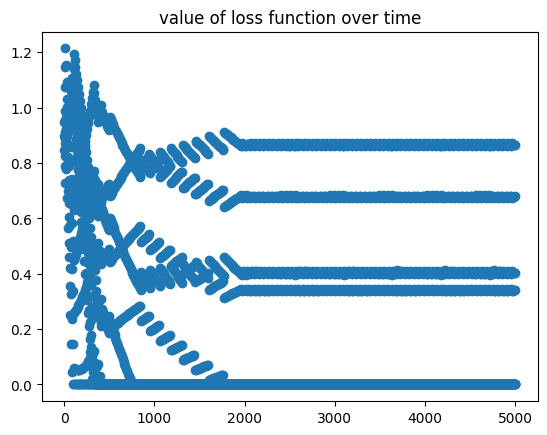

In [939]:
clf = BinaryLinearSVM()
#student scores vs pass(+1) or fail(-1)
X = np.array(
   [np.array([x_temp]) for x_temp in [0.05, +0.1, +0.2, +0.3, +0.4, +0.5, +0.6, +0.7, +0.8, +0.9]]
)
Y = np.array([-1,-1,-1,-1,-1, +1, +1, +1, +1, +1])
clf.fit(X,Y)

In [940]:
print(clf.w,clf.b)

[4.02077568] 1.7500000000000009


In [941]:
clf.predict_y(clf.b, clf.w, np.array([0.435]))

-1

# Application: predicting wether a student failed or not using test score and number of hours studied data

In [942]:
import pandas as pd
df = pd.read_csv("linear_regression/data/score.csv")

Preparing our data(student scores, number of hours studied vs passing or failing)

In [943]:
X, y = np.array(
    [np.array([df["Hours"].iloc[i], df["Scores"].iloc[i]]) for i in range(len(df["Hours"]))]
), np.array([+1 if score >= 50 else -1 for score in df["Scores"]])


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
# display(X_train)
print(X_train.shape)
X_train = X_train
X_test = X_test
# display(X_train)
print(X_train.shape)

(12, 2)
(12, 2)


Plotting our data

Text(0.5, 1.0, 'Passing vs failing(black=fail, yellow=pass)')

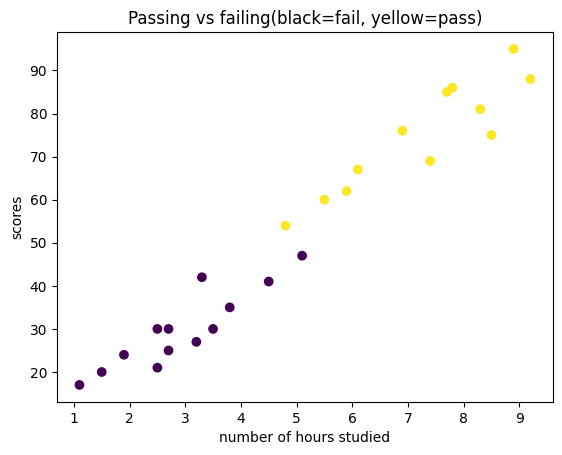

In [944]:
plt.scatter(x=X[:,0],y=X[:,1],c = y)
plt.xlabel("number of hours studied")
plt.ylabel("scores")
plt.title("Passing vs failing(black=fail, yellow=pass)")

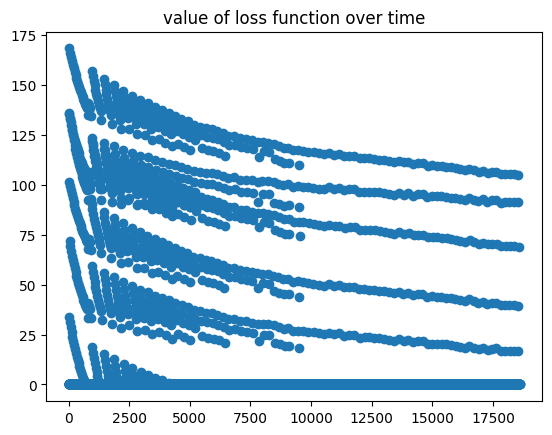

In [945]:
clf = BinaryLinearSVM()
clf.fit(X_train,Y_train,lr=0.1,max_steps=1550)

In [946]:
clf.score(X=X_test,Y=Y_test)

1.0

In [947]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.title("SVM hyperplane")
    plt.show()

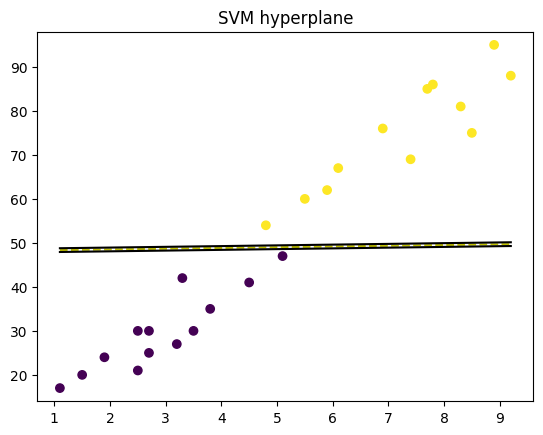

In [948]:
visualize_svm()